# Data-Analysis: Titanic

# Project Preview

<img src="../assets/titanic-pic.jpg" alt="Title-Pic">

### Data StoryTelling

This dataset contains data about the passengers of the titanic and whether or whether not they have survived.

#### Main Topic

- **Which Features got an effect on the survival of an Passenger?**

# Imports

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


np.set_printoptions(suppress=True)

sns.set(rc={"figure.figsize": (12, 7), "axes.titlesize": 20, "axes.titleweight": "bold", "axes.labelsize": 15})
sns.set_palette("Set2")
warnings.filterwarnings('ignore')

# Data

In [192]:
df_titanic = pd.read_csv("../data/titanic_data.csv")
df_raw_data = df_titanic.copy()

PASSENGER_ID = "PassengerId"
SURVIVED = "Survived"
CLASS = "Pclass"
NAME = "Name"
SEX = "Sex"
AGE = "Age"
FAMILY1 = "SibSp"
FAMILY2 = "Parch"
TICKET = "Ticket"
TICKET_PRICE = "Fare"
CABIN = "Cabin"
EMBARKED = "Embarked"

df_raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [193]:
df_cleaned = df_raw_data.copy()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [194]:
df_cleaned.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [195]:
df_cleaned.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [196]:
df_cleaned.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*`Age` and `Cabin` got NaN-Values* <br/>
*`Cabin` got a lot of NaN-Values*

#### Filter preparation for cleaned df

In [197]:
age_cleaned_filter = df_cleaned[AGE].notna()
cabin_cleaned_filter = df_cleaned[CABIN].notna()
embarked_cleaned_filter = df_cleaned[EMBARKED].notna()

# Data cleaning & preparation

- drop name
- drop ticket
- renaming `Fare` to `Ticket_Price`
- renaming `Pclass` to `Class`
- round `Age`
- combine `Family1` & `Family2`
- classify passenger family: with family, without family
- drop family 1 and 2
- classify `Sex` to `Person`: male, female, child (< 16y)
- prepare `Survived`: 0: 'died', 1: 'survived'
- map `Embarked` {"S": "Southampton", "C": "Cherbourg", "Q": "Queenstown"}
- prepare `Cabin`

## Drop `Name` & `Ticket` and renaming `Fare` & `Pclass` to `Class`

In [198]:
df_cleaned.drop(columns=[NAME, TICKET], inplace=True)

TICKET_PRICE = "Ticket_Price"
CLASS = "Class"
df_cleaned.rename(columns={"Fare": TICKET_PRICE, "Pclass": CLASS}, inplace=True)

df_cleaned.columns

Index(['PassengerId', 'Survived', 'Class', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket_Price', 'Cabin', 'Embarked'],
      dtype='object')

## Prepare `Age`

In [199]:
df_cleaned[AGE].unique(), df_cleaned[AGE].min()

(array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
         4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
         8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
        49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
        16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
        71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
        51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
        45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
        60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
        70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ]),
 0.42)

In [200]:
df_cleaned.loc[age_cleaned_filter, AGE] = df_cleaned.loc[age_cleaned_filter, AGE].astype(np.int16)
df_cleaned[AGE].unique(), df_cleaned[AGE].min()

(array([22., 38., 26., 35., nan, 54.,  2., 27., 14.,  4., 58., 20., 39.,
        55., 31., 34., 15., 28.,  8., 19., 40., 66., 42., 21., 18.,  3.,
         7., 49., 29., 65.,  5., 11., 45., 17., 32., 16., 25.,  0., 30.,
        33., 23., 24., 46., 59., 71., 37., 47., 70., 12.,  9., 36., 51.,
        44.,  1., 61., 56., 50., 62., 41., 52., 63., 43., 60., 10., 64.,
        13., 48., 53., 57., 80.,  6., 74.]),
 0.0)

## Prepare `Survived`

In [201]:
SURVIVED_CAT = "Survived_Cat"
df_cleaned[SURVIVED_CAT] = df_cleaned[SURVIVED].map({0: "died", 1: "survived"}).astype("category")
df_cleaned

,PassengerId,Survived,Class,Sex,Age,SibSp,Parch,Ticket_Price,Cabin,Embarked,Survived_Cat
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,died
1,2,1,1,female,38.0,1,0,71.2833,C85,C,survived
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,survived
3,4,1,1,female,35.0,1,0,53.1000,C123,S,survived
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,died
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S,died
887,888,1,1,female,19.0,0,0,30.0000,B42,S,survived
888,889,0,3,female,NaN,1,2,23.4500,NaN,S,died
889,890,1,1,male,26.0,0,0,30.0000,C148,C,survived


## Prepare `Family`

### 1) Combine `Family1` & `Family2` to `Family`

In [202]:
FAMILY = "Family"
df_cleaned[FAMILY] = df_cleaned[[FAMILY1, FAMILY2]].apply(lambda f1_f2: "without Family" if sum(f1_f2) == 0 else "with Family", axis=1)
df_cleaned[FAMILY].value_counts()

without Family    537
with Family       354
Name: Family, dtype: int64

### 2) Drop `Family` 1 & 2

In [203]:
df_cleaned.drop(columns=[FAMILY1, FAMILY2], inplace=True)
df_cleaned.columns

Index(['PassengerId', 'Survived', 'Class', 'Sex', 'Age', 'Ticket_Price',
       'Cabin', 'Embarked', 'Survived_Cat', 'Family'],
      dtype='object')

## Classify `Person`

In [204]:
PERSON = "Person"
df_cleaned[PERSON] = df_cleaned[[AGE, SEX]].apply(lambda age_sex: "child" if age_sex[0] < 16 else age_sex[1], axis=1)
df_cleaned[PERSON].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

## Prepare Cabin

In [205]:
prep_cabin = df_cleaned.loc[cabin_cleaned_filter, CABIN].str.slice(0, 1)
prep_cabin.unique()

array(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [206]:
df_cleaned.loc[cabin_cleaned_filter, CABIN] = prep_cabin
df_cleaned[CABIN].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

## Embarked full name

In [207]:
embarked_map = {"S": "Southampton", "C": "Cherbourg", "Q": "Queenstown"}
df_cleaned.loc[embarked_cleaned_filter, EMBARKED] = df_cleaned.loc[embarked_cleaned_filter, EMBARKED].map(embarked_map)
df_cleaned[EMBARKED].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64

## Clean dataset

In [208]:
df_cleaned.head(10)

,PassengerId,Survived,Class,Sex,Age,Ticket_Price,Cabin,Embarked,Survived_Cat,Family,Person
0,1,0,3,male,22.0,7.2500,NaN,Southampton,died,with Family,male
1,2,1,1,female,38.0,71.2833,C,Cherbourg,survived,with Family,female
2,3,1,3,female,26.0,7.9250,NaN,Southampton,survived,without Family,female
3,4,1,1,female,35.0,53.1000,C,Southampton,survived,with Family,female
4,5,0,3,male,35.0,8.0500,NaN,Southampton,died,without Family,male
5,6,0,3,male,NaN,8.4583,NaN,Queenstown,died,without Family,male
6,7,0,1,male,54.0,51.8625,E,Southampton,died,without Family,male
7,8,0,3,male,2.0,21.0750,NaN,Southampton,died,with Family,child
8,9,1,3,female,27.0,11.1333,NaN,Southampton,survived,with Family,female
9,10,1,2,female,14.0,30.0708,NaN,Cherbourg,survived,with Family,child


# Data preprocessing & interpretation

### Feature influence on survival
- Does the `Class` has any affect on the survival?
- Does the `Age` or the `Person` has any affect on the survival?
- Does the `Sex` has any affect on the survival?
- Does the `Family`-members on board has any affect on the survival?
- Does the `Cabin` has any affect on the survival?

- Does the `Person` and `Class` has any affect on the survival?
- Does the `Sex` and `Class` has any affect on the survival?

## Distribution of `Age` on board

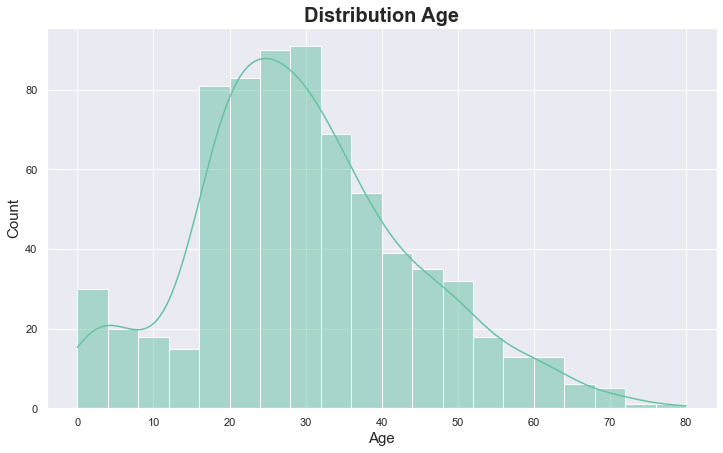

In [209]:
sns.histplot(x=AGE, data=df_cleaned, kde=True).set(title="Distribution Age");

## Distribution of `Age` and `Sex` on board

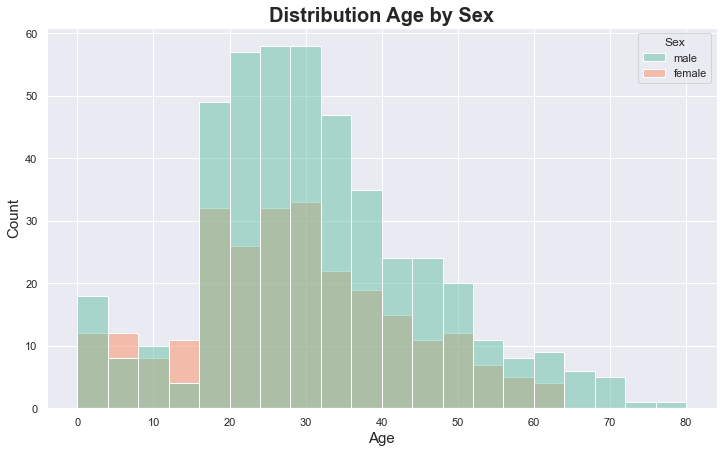

In [210]:
sns.histplot(x=AGE, data=df_cleaned, hue=SEX).set(title="Distribution Age by Sex");

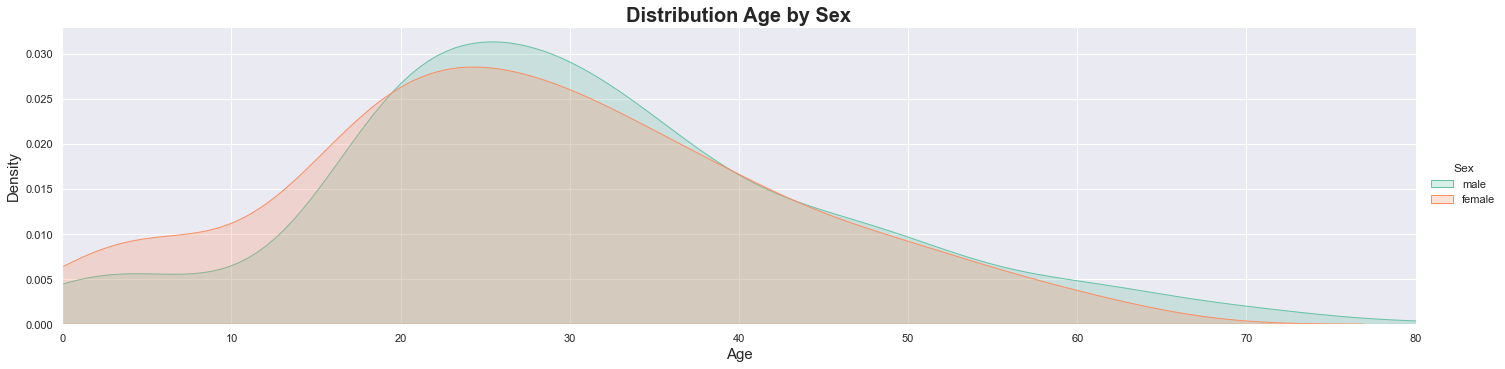

In [211]:
fig = sns.FacetGrid(data=df_cleaned, hue=SEX, aspect=4, height=5)
fig.map(sns.kdeplot, AGE, shade=True)
fig.set(xlim=(0, df_cleaned[AGE].max()), title="Distribution Age by Sex")
fig.add_legend();

## Distribution of `Age` and `Class`

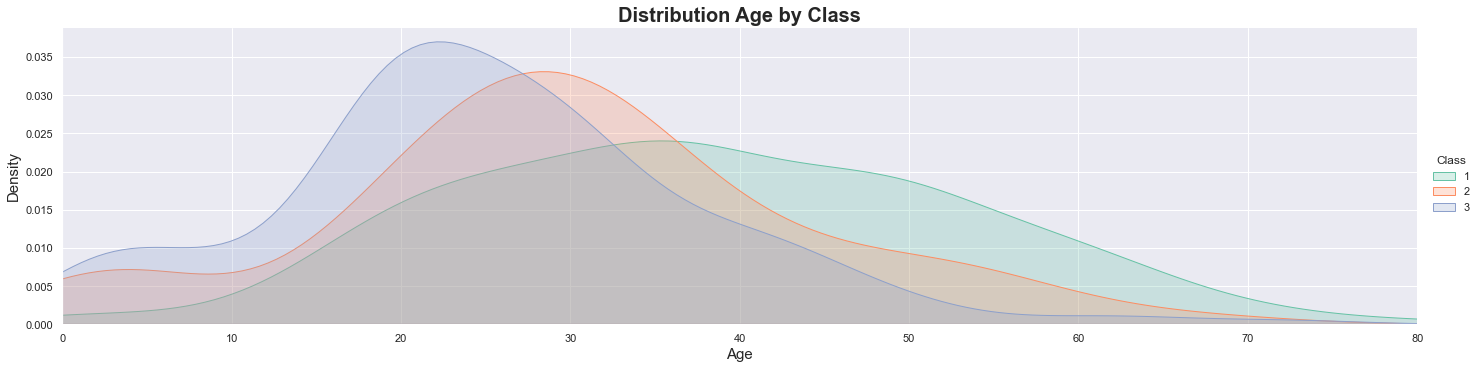

In [212]:
fig = sns.FacetGrid(df_cleaned, hue=CLASS, aspect=4, height=5)
fig.map(sns.kdeplot, AGE, shade=True)
fig.set(xlim=(0, df_cleaned[AGE].max()), title="Distribution Age by Class")
fig.add_legend();

## Distribution of `Person` on board

male      537
female    271
child      83
Name: Person, dtype: int64

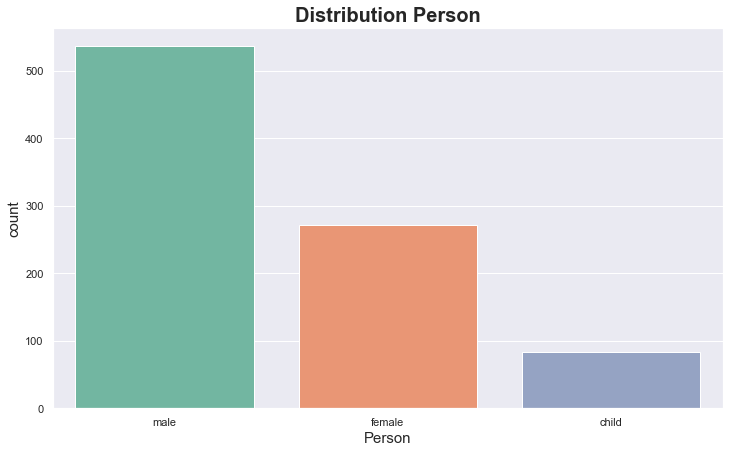

In [213]:
sns.countplot(x=PERSON, data=df_cleaned).set(title="Distribution Person")
df_cleaned[PERSON].value_counts()

## Distribution of `Person` in `Class` on board

Person,child,female,male,All
Class,,,,
1,6,91,119,216
2,19,66,99,184
3,58,114,319,491
All,83,271,537,891


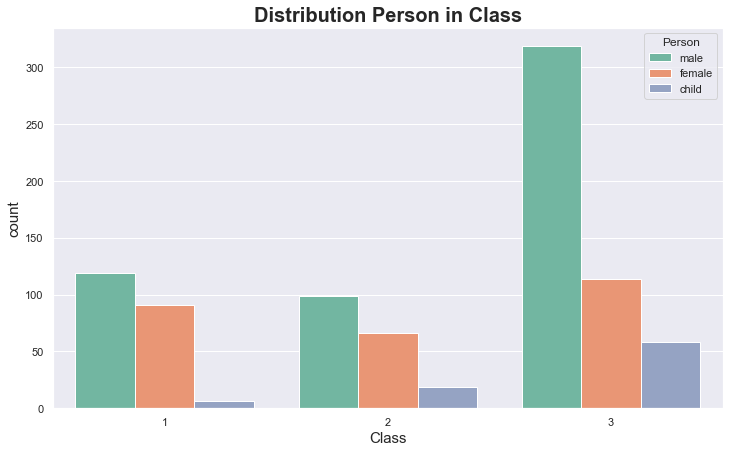

In [214]:
sns.countplot(x=CLASS, data=df_cleaned, hue=PERSON).set(title="Distribution Person in Class")
df_class_person_pvt_mar = df_cleaned.pivot_table(index=CLASS, columns=PERSON, values=PASSENGER_ID, aggfunc="count", margins=True)
df_class_person_pvt = df_cleaned.pivot_table(index=CLASS, columns=PERSON, values=PASSENGER_ID, aggfunc="count")
df_class_person_pvt_mar

In [215]:
# prop of sex in each class
con_table_class_person = df_class_person_pvt / df_class_person_pvt.sum()
con_table_class_person

Person,child,female,male
Class,,,
1,0.072289,0.335793,0.221601
2,0.228916,0.243542,0.184358
3,0.698795,0.420664,0.594041


In [216]:
con_table_class_person_unpvt = pd.DataFrame(con_table_class_person.to_records())
id_vars = CLASS
value_vars = con_table_class_person_unpvt.columns[1:]
con_table_class_person_unpvt = con_table_class_person_unpvt.melt(id_vars=id_vars, value_vars=value_vars, var_name=PERSON, value_name="Prop_Person")
con_table_class_person_unpvt

,Class,Person,Prop_Person
0,1,child,0.072289
1,2,child,0.228916
2,3,child,0.698795
3,1,female,0.335793
4,2,female,0.243542
5,3,female,0.420664
6,1,male,0.221601
7,2,male,0.184358
8,3,male,0.594041


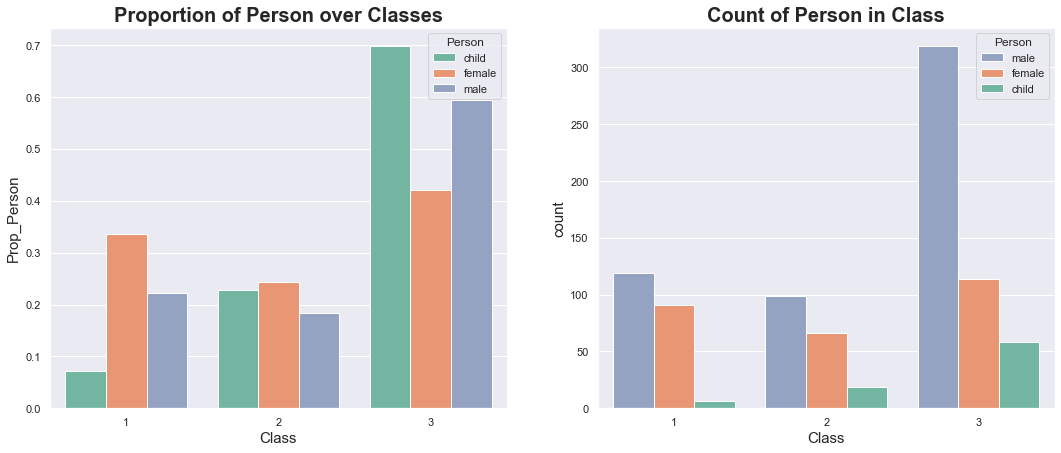

In [217]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))
ax1, ax2 = axes

cmap = {
    "child": "C0",
    "female": "C1",
    "male": "C2"
}

sns.barplot(x=CLASS, y="Prop_Person", data=con_table_class_person_unpvt, hue=PERSON, ax=ax1, palette=cmap).set(title="Proportion of Person over Classes")
sns.countplot(x=CLASS, data=df_cleaned, hue=PERSON, ax=ax2, palette=cmap).set(title="Count of Person in Class");

Proportion vs. Count <br/>
<br/>
Male passengers are predominantly in the third class. <br/>
Female passengers are predominantly in the first class, but not that much concentrated, like the male passengers in the third class.

## Distribution of `Embarked`

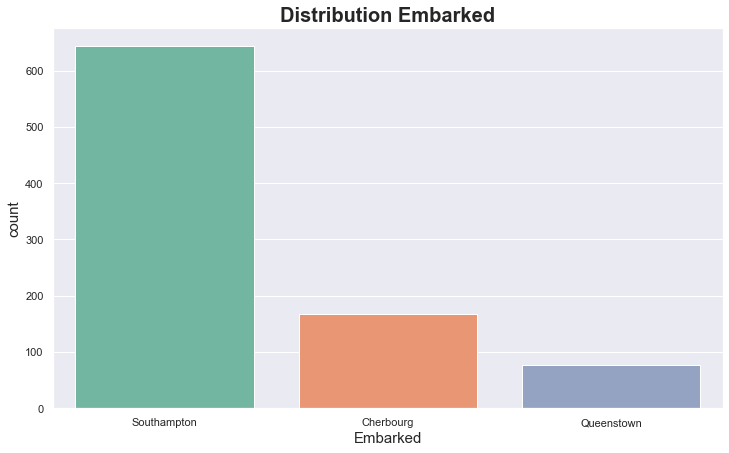

In [218]:
sns.countplot(x=EMBARKED, data=df_cleaned).set(title="Distribution Embarked");

Most passengers embarked in Southampton.

## Distribution of `Embarked` by `Class`

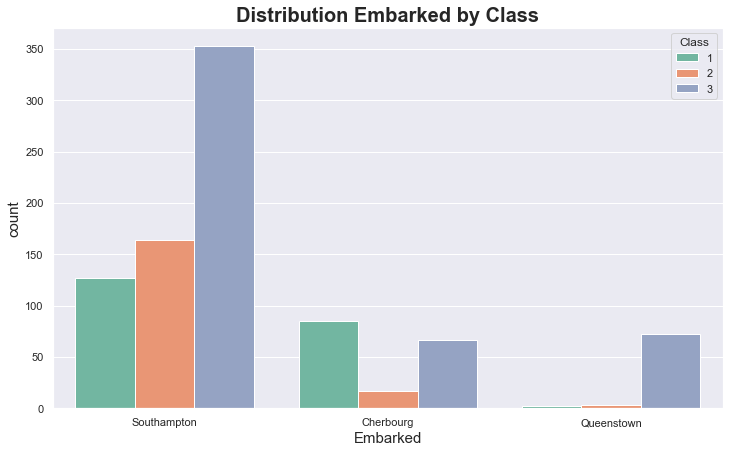

In [219]:
sns.countplot(x=EMBARKED, data=df_cleaned, hue=CLASS).set(title="Distribution Embarked by Class");

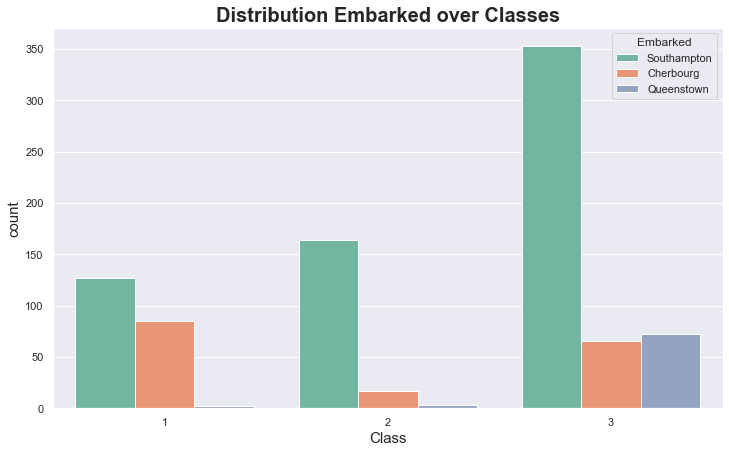

In [220]:
sns.countplot(x=CLASS, data=df_cleaned, hue=EMBARKED).set(title="Distribution Embarked over Classes");

In [221]:
df_embarked_class_pvt_mar = df_cleaned.pivot_table(values=PASSENGER_ID, index=CLASS, columns=EMBARKED, aggfunc="count", margins=True)
df_embarked_class_pvt = df_cleaned.pivot_table(values=PASSENGER_ID, index=CLASS, columns=EMBARKED, aggfunc="count")
df_embarked_class_pvt_mar

Embarked,Cherbourg,Queenstown,Southampton,All
Class,,,,
1,85,2,127,214
2,17,3,164,184
3,66,72,353,491
All,168,77,644,889


In [222]:
vsum = df_embarked_class_pvt.sum(axis=1)
df_embarked_class_unpvt = df_embarked_class_pvt.apply(lambda v: v / vsum)# = df_embarked_class_pvt / df_embarked_class_pvt.sum()
df_embarked_class_unpvt

Embarked,Cherbourg,Queenstown,Southampton
Class,,,
1,0.397196,0.009346,0.593458
2,0.092391,0.016304,0.891304
3,0.134420,0.146640,0.718941


In [223]:
df_embarked_class_unpvt2 = df_embarked_class_pvt / df_embarked_class_pvt.sum()
df_embarked_class_unpvt2

Embarked,Cherbourg,Queenstown,Southampton
Class,,,
1,0.505952,0.025974,0.197205
2,0.101190,0.038961,0.254658
3,0.392857,0.935065,0.548137


In [224]:
df_embarked_class_unpvt = pd.DataFrame(df_embarked_class_unpvt.to_records())

id_vars = CLASS
value_vars = df_embarked_class_unpvt.columns[1:]
df_embarked_class_unpvt = df_embarked_class_unpvt.melt(id_vars=id_vars, value_vars=value_vars, var_name=EMBARKED, value_name="Prop_Embarked")
df_embarked_class_unpvt

,Class,Embarked,Prop_Embarked
0,1,Cherbourg,0.397196
1,2,Cherbourg,0.092391
2,3,Cherbourg,0.134420
3,1,Queenstown,0.009346
4,2,Queenstown,0.016304
5,3,Queenstown,0.146640
6,1,Southampton,0.593458
7,2,Southampton,0.891304
8,3,Southampton,0.718941


In [225]:
df_embarked_class_unpvt2 = pd.DataFrame(df_embarked_class_unpvt2.to_records())

id_vars = CLASS
value_vars = df_embarked_class_unpvt2.columns[1:]
df_embarked_class_unpvt2 = df_embarked_class_unpvt2.melt(id_vars=id_vars, value_vars=value_vars, var_name=EMBARKED, value_name="Prop_Embarked")
df_embarked_class_unpvt2

,Class,Embarked,Prop_Embarked
0,1,Cherbourg,0.505952
1,2,Cherbourg,0.101190
2,3,Cherbourg,0.392857
3,1,Queenstown,0.025974
4,2,Queenstown,0.038961
5,3,Queenstown,0.935065
6,1,Southampton,0.197205
7,2,Southampton,0.254658
8,3,Southampton,0.548137


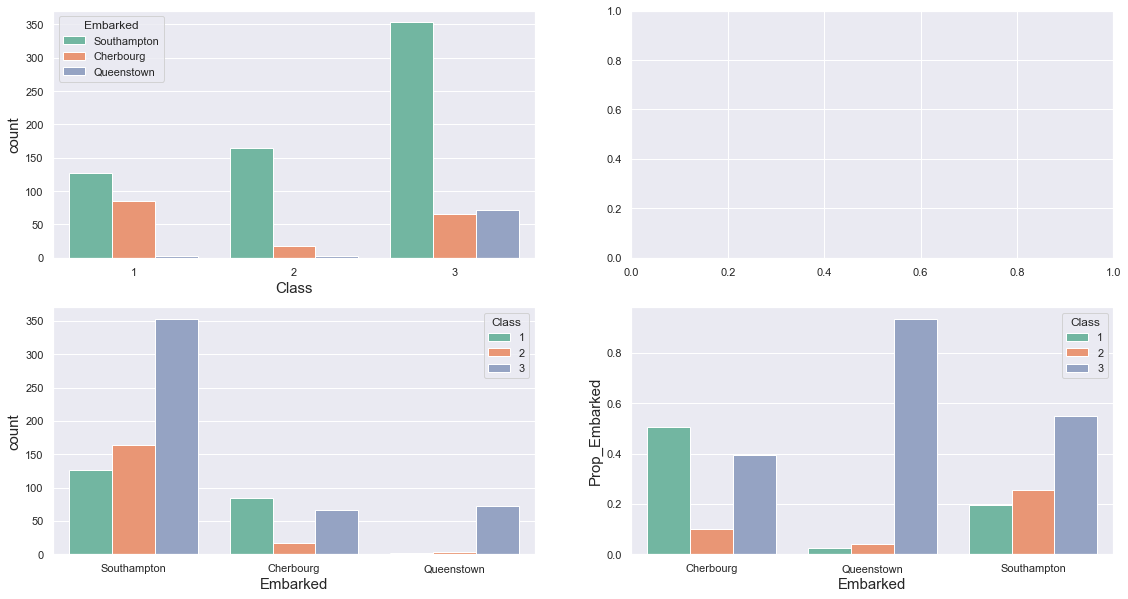

In [226]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(19, 10))
row1, row2 = axes
ax1, _ = row1
ax2, ax3 = row2

sns.countplot(x=CLASS, hue=EMBARKED, data=df_cleaned, ax=ax1)
sns.countplot(x=EMBARKED, hue=CLASS, data=df_cleaned, ax=ax2)
sns.barplot(x=EMBARKED, hue=CLASS, y="Prop_Embarked", data=df_embarked_class_unpvt2, ax=ax3);

In total numbers, it looks like that the most people who are in the first class are from SOUTHAMPTON. And in total number is that correct. But we want to know, how the real distribution is. And for that, wie calculated the relative proportion and the result is, that CHERBOURG has the most first-class passengers and QUEENSTOWN got the most third-class passengers. <br/>
This could be an indicator that people from CHERBOURG has an higher income, then people from SOUTHAMPTON or QUEENSTOWN. <br/>
And the fact, that QUEENSTOWN got the most third-class passengers, this could be an indicator that people from QUEENSTOWN has an lower income the SOUTHAMPTON and CHERBOURG.

In [227]:
df_cleaned.groupby(CLASS).agg({TICKET_PRICE: np.mean})

,Ticket_Price
Class,
1,84.154687
2,20.662183
3,13.675550


##  Distribution of passengers `with Family` and `without Family`

without Family    537
with Family       354
Name: Family, dtype: int64

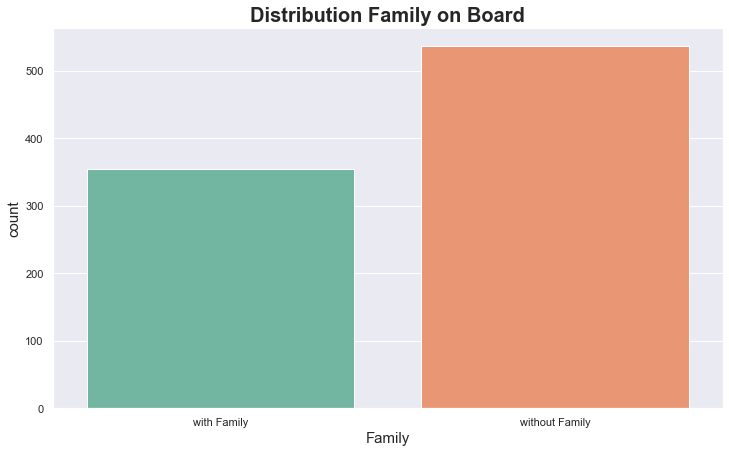

In [228]:
sns.countplot(x=FAMILY, data=df_cleaned).set(title="Distribution Family on Board")
df_cleaned[FAMILY].value_counts()

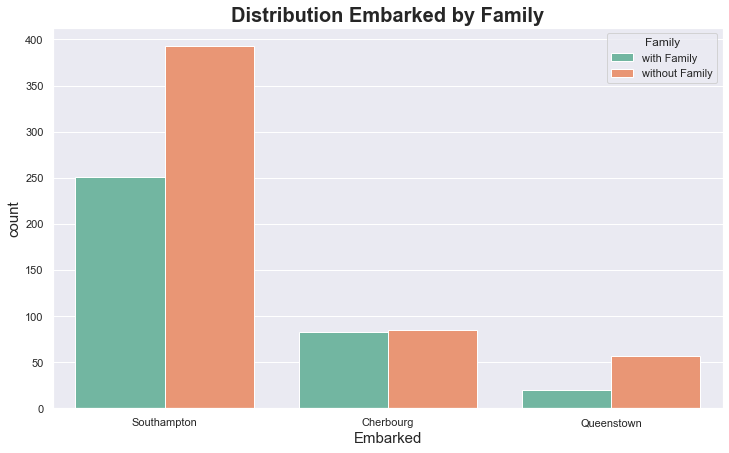

In [229]:
sns.countplot(x=EMBARKED, hue=FAMILY, data=df_cleaned).set(title="Distribution Embarked by Family")
df_cleaned.pivot_table(values=PASSENGER_ID, columns=FAMILY, index=EMBARKED, aggfunc="count");

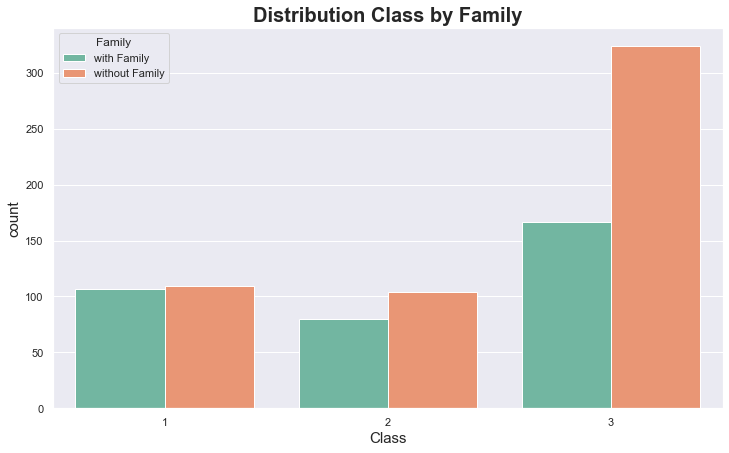

In [230]:
sns.countplot(x=CLASS, hue=FAMILY, data=df_cleaned).set(title="Distribution Class by Family");

## Distribution of passengers `Survive`

died        549
survived    342
Name: Survived_Cat, dtype: int64

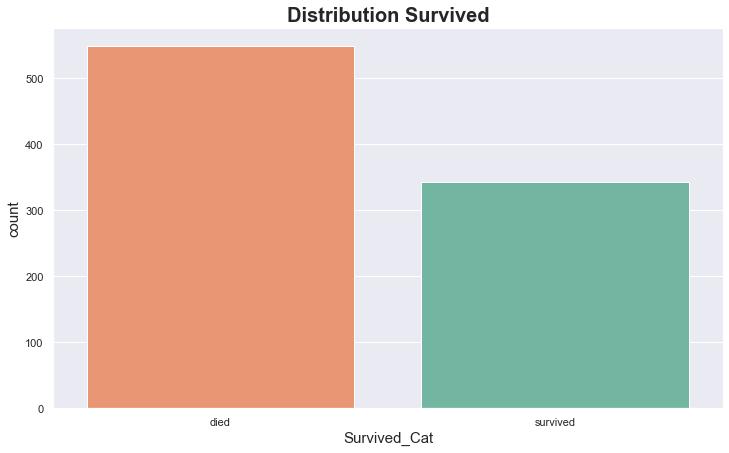

In [231]:
cmap_survived_died = {"died": "C1", "survived": "C0"}
sns.countplot(x=SURVIVED_CAT, data=df_cleaned, palette=cmap_survived_died).set(title="Distribution Survived")
df_cleaned[SURVIVED_CAT].value_counts()

## Distribution of passengers `Survive` by `Person`

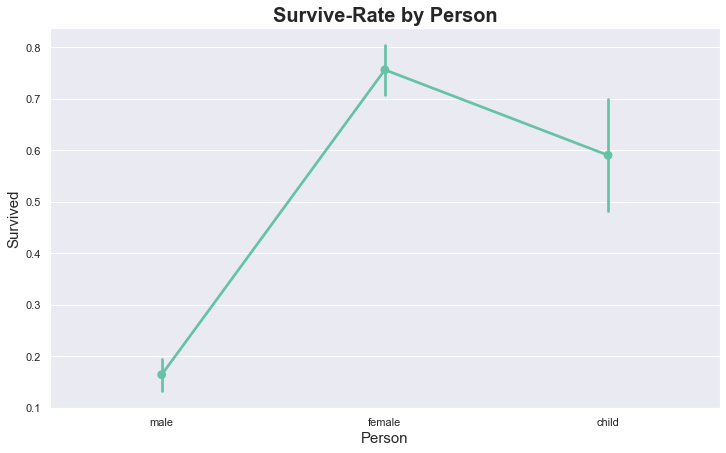

In [232]:
sns.pointplot(x=PERSON, y=SURVIVED, data=df_cleaned).set(title="Survive-Rate by Person");

Person,child,female,male
Survived_Cat,,,
survived,49,205,88
died,34,66,449


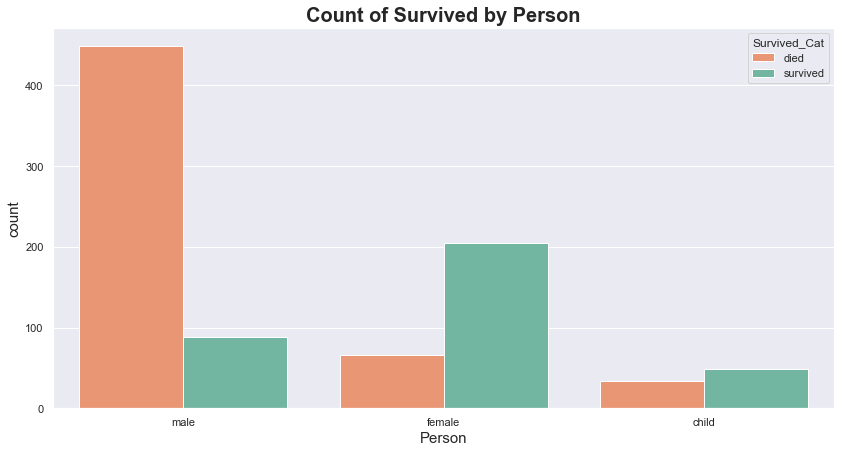

In [233]:
plt.figure(figsize=(14, 7))
sns.countplot(x=PERSON, hue=SURVIVED_CAT, data=df_cleaned, palette=cmap_survived_died).set(title="Count of Survived by Person")

df_survived_person_pvt = df_cleaned.pivot_table(values=PASSENGER_ID, columns=PERSON, index=SURVIVED_CAT, aggfunc="count").sort_index(ascending=False)
df_survived_person_pvt

In [234]:
df_survived_person_pvt / df_survived_person_pvt.sum()

Person,child,female,male
Survived_Cat,,,
survived,0.590361,0.756458,0.163873
died,0.409639,0.243542,0.836127


Male passengers has a survive rate of 16.4 % to 83.6 %. <br>
Female passengers has a survive rate of 75.6 % to 24.4 %. <br>
Children has a survive rate of 59.0 % to 41.0 %. <br>

## Distribution of passengers `Survive` by `Class`

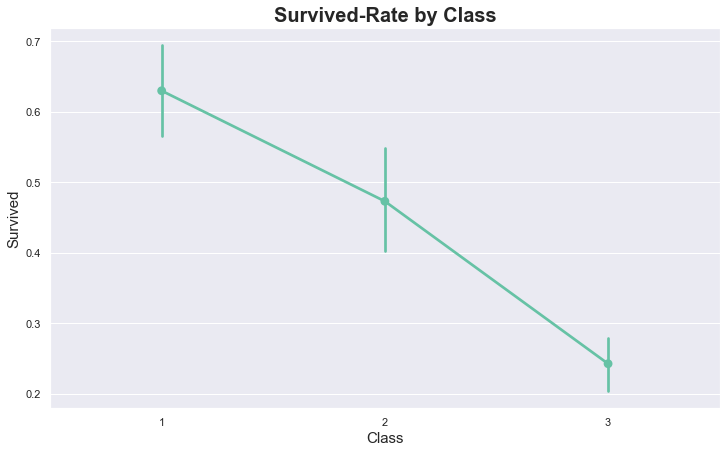

In [235]:
sns.pointplot(x=CLASS, y=SURVIVED, data=df_cleaned).set(title="Survived-Rate by Class");

Class,1,2,3
Survived_Cat,,,
survived,136,87,119
died,80,97,372


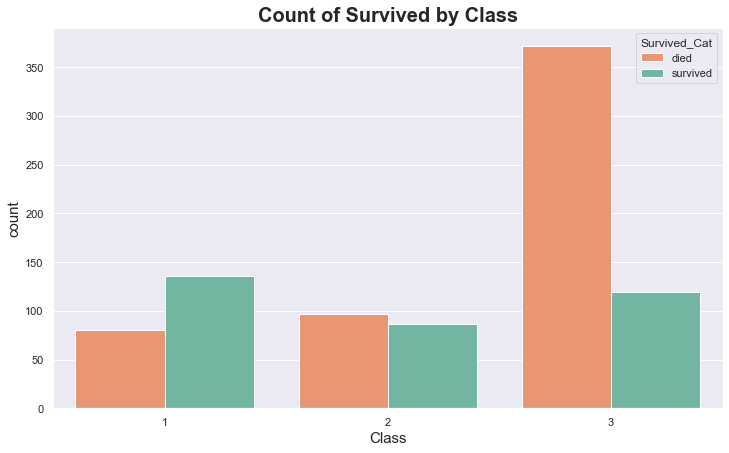

In [236]:
sns.countplot(x=CLASS, hue=SURVIVED_CAT, data=df_cleaned, palette=cmap_survived_died).set(title="Count of Survived by Class")
df_survived_class_pvt = df_cleaned.pivot_table(values=PASSENGER_ID, index=SURVIVED_CAT, columns=CLASS, aggfunc="count").sort_index(ascending=False)
df_survived_class_pvt

In [237]:
df_survived_class_pvt / df_survived_class_pvt.sum()

Class,1,2,3
Survived_Cat,,,
survived,0.62963,0.472826,0.242363
died,0.37037,0.527174,0.757637


Passengers in the first-class got the highest chance to survive and passengers in the third-class got the lowest chance to survive.

## Distribution of passengers `Survive` by `Cabin`

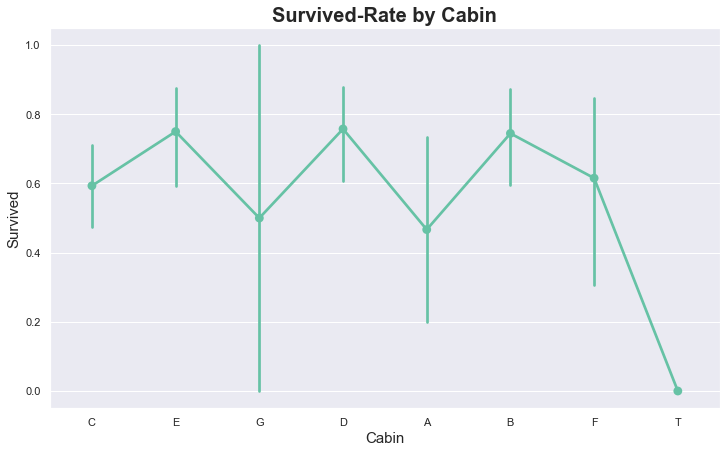

In [238]:
sns.pointplot(x=CABIN, y=SURVIVED, data=df_cleaned).set(title="Survived-Rate by Cabin");

Cabin,A,B,C,D,E,F,G,T
Survived_Cat,,,,,,,,
survived,7,35,35,25,24,8,2,0
died,8,12,24,8,8,5,2,1


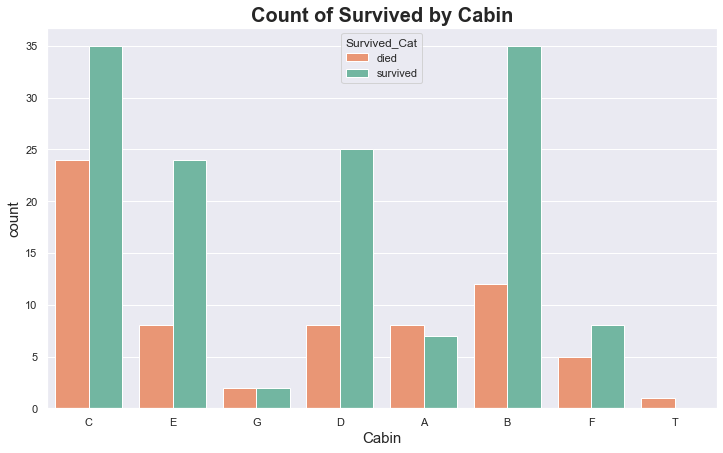

In [239]:
sns.countplot(x=CABIN, hue=SURVIVED_CAT, data=df_cleaned, palette=cmap_survived_died).set(title="Count of Survived by Cabin")
df_survived_cabin = df_cleaned.pivot_table(values=PASSENGER_ID, index=SURVIVED_CAT, columns=CABIN, aggfunc="count").sort_index(ascending=False)
df_survived_cabin

In [240]:
df_survived_cabin / df_survived_cabin.sum()

Cabin,A,B,C,D,E,F,G,T
Survived_Cat,,,,,,,,
survived,0.466667,0.744681,0.59322,0.757576,0.75,0.615385,0.5,0.0
died,0.533333,0.255319,0.40678,0.242424,0.25,0.384615,0.5,1.0


## Distribution of passengers `Survive` by `Person` and `Class`

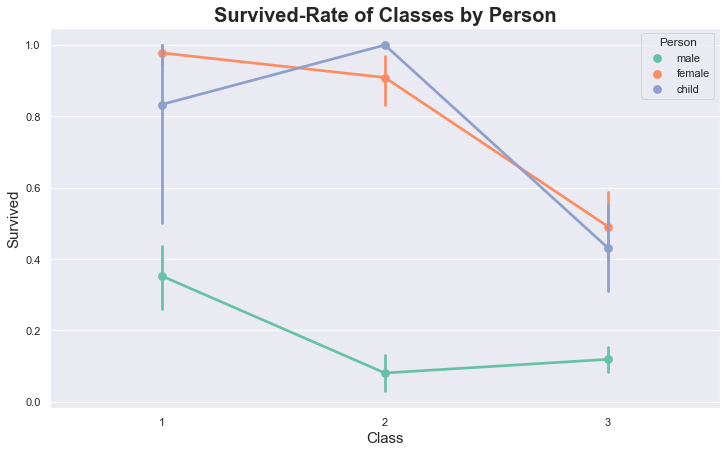

In [241]:
sns.pointplot(x=CLASS, y=SURVIVED, hue=PERSON, data=df_cleaned).set(title="Survived-Rate of Classes by Person");

Person          child  female   male
Survived Class                      
1        1        5.0    89.0   42.0
         2       19.0    60.0    8.0
         3       25.0    56.0   38.0
0        1        1.0     2.0   77.0
         2        NaN     6.0   91.0
         3       33.0    58.0  281.0

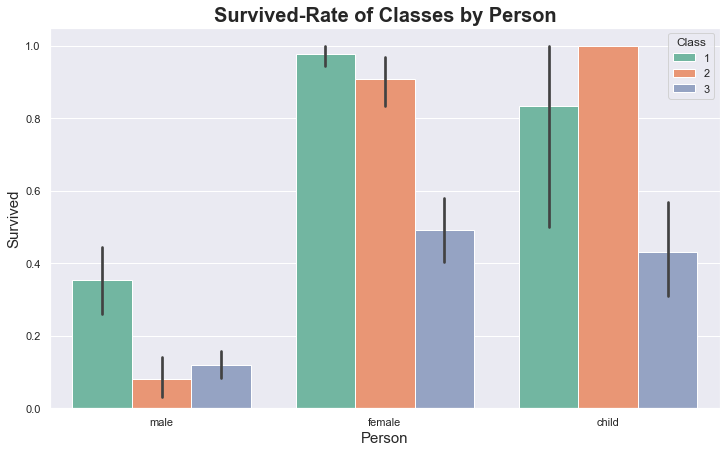

In [242]:
sns.barplot(x=PERSON, y=SURVIVED, hue=CLASS, data=df_cleaned).set(title="Survived-Rate of Classes by Person");
df_survived_person_class_pvt = df_cleaned.pivot_table(values=PASSENGER_ID, index=[SURVIVED, CLASS], columns=PERSON, aggfunc="count").sort_index(ascending=[False, True])
df_survived_person_class_pvt

In [243]:
df_survived_person_class_pvt.loc[1] / (df_survived_person_class_pvt.loc[0].fillna(0) + df_survived_person_class_pvt.loc[1])

Person,child,female,male
Class,,,
1,0.833333,0.978022,0.352941
2,1.000000,0.909091,0.080808
3,0.431034,0.491228,0.119122


## Does the `Class` has any affect on the survival?

Class,1,2,3
Survived_Cat,,,
died,80,97,372
survived,136,87,119


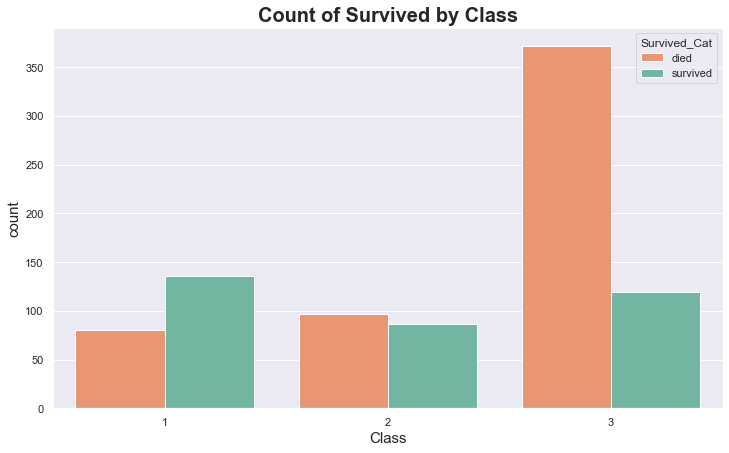

In [244]:
sns.countplot(x=CLASS, hue=SURVIVED_CAT, data=df_cleaned, palette=cmap_survived_died).set(title="Count of Survived by Class");
df_cleaned.pivot_table(values=SURVIVED, index=SURVIVED_CAT, columns=CLASS, aggfunc="count")

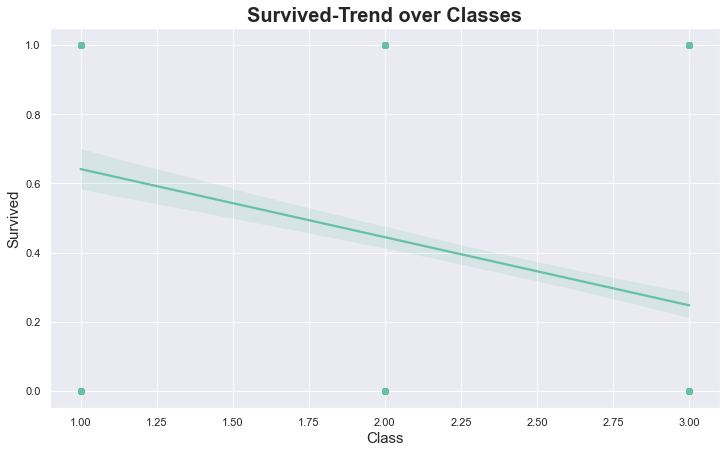

In [245]:
sns.regplot(x=CLASS, y=SURVIVED, data=df_cleaned).set(title="Survived-Trend over Classes");

,Survived
Class,
1,0.629630
2,0.472826
3,0.242363


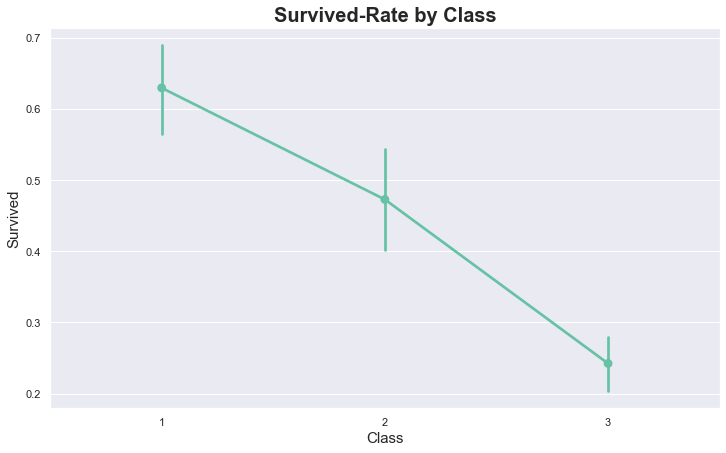

In [246]:
sns.pointplot(x=CLASS, y=SURVIVED, data=df_cleaned).set(title="Survived-Rate by Class");
df_cleaned.pivot_table(values=SURVIVED, index=CLASS)

Person,child,female,male
Class,,,
1,0.833333,0.978022,0.352941
2,1.000000,0.909091,0.080808
3,0.431034,0.491228,0.119122


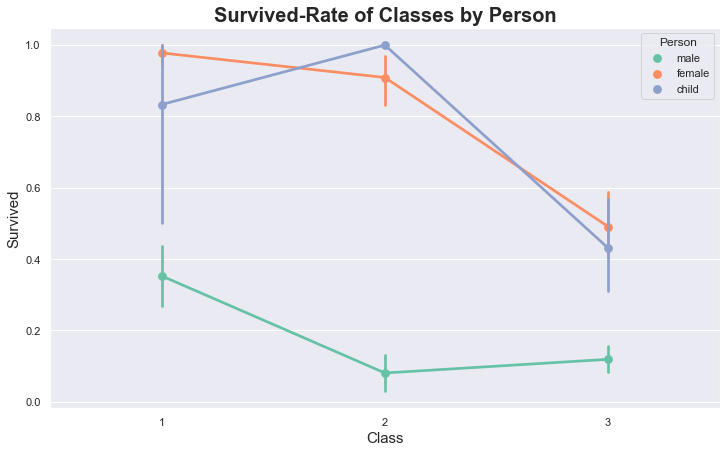

In [247]:
sns.pointplot(x=CLASS, y=SURVIVED, hue=PERSON, data=df_cleaned).set(title="Survived-Rate of Classes by Person");
df_cleaned.pivot_table(values=SURVIVED, index=CLASS, columns=PERSON)

In [248]:
pvt = df_cleaned.pivot_table(values=PASSENGER_ID, index=SURVIVED_CAT, columns=CLASS, aggfunc="count")
survival_ratios = pvt / pvt.sum()
survival_ratios

Class,1,2,3
Survived_Cat,,,
died,0.37037,0.527174,0.757637
survived,0.62963,0.472826,0.242363


In [249]:
class_1_ratio = survival_ratios.loc["survived", 1]
class_3_ratio = survival_ratios.loc["survived", 3]
class_1_ratio / class_3_ratio

2.597883597883598

YES! The class has definitely an impact on the chance to survive. <br>
For example, Passengers in the first-class has got a 2.6 times higher chance to survive, then passenger in the third class <br>
The reason for this could be, that the ship goes early down at the third-class area.

## Does the `Family`-members on board has any affect on the survival?

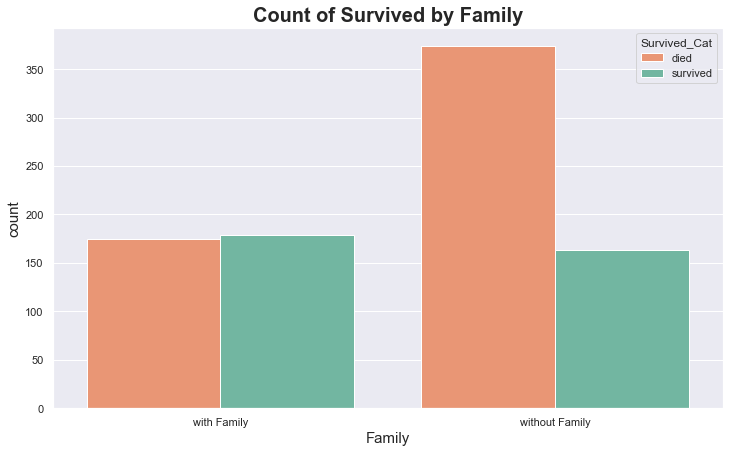

In [250]:
sns.countplot(x=FAMILY, hue=SURVIVED_CAT, data=df_cleaned, palette=cmap_survived_died).set(title="Count of Survived by Family");

Family,with Family,without Family
Survived_Cat,,
survived,0.50565,0.303538
died,0.49435,0.696462


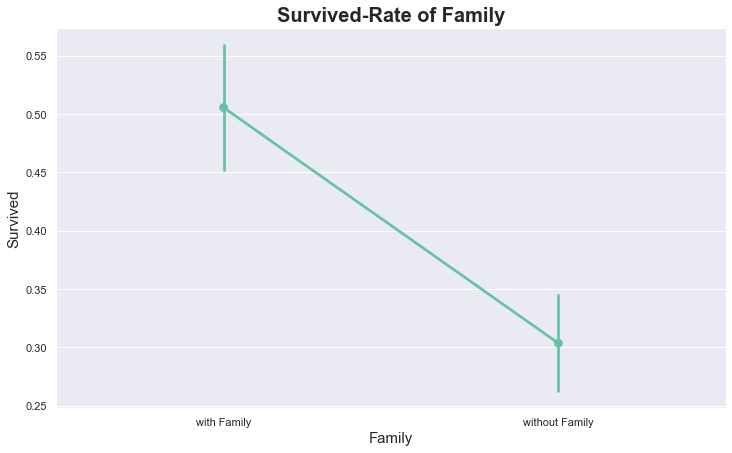

In [251]:
sns.pointplot(x=FAMILY, y=SURVIVED, data=df_cleaned).set(title="Survived-Rate of Family");
df_survived_family = df_cleaned.pivot_table(values=PASSENGER_ID, index=SURVIVED_CAT, columns=FAMILY, aggfunc="count").sort_index(ascending=False)
df_survived_family / df_survived_family.sum()

So, in relative and absolute terms, more passengers died without families on board

without Family    537
with Family       354
Name: Family, dtype: int64

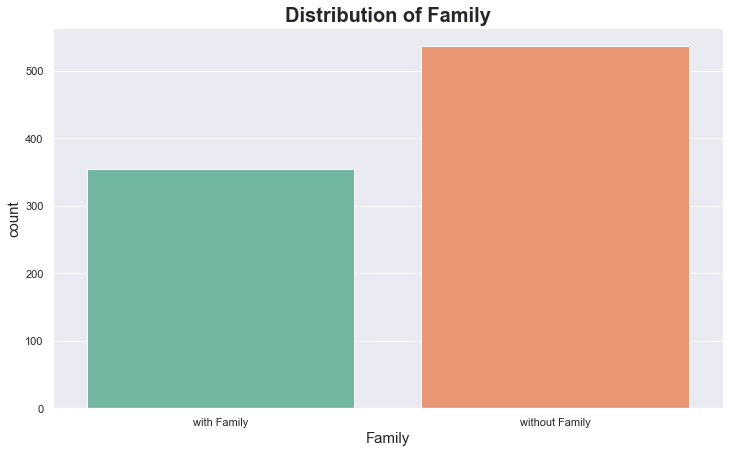

In [252]:
sns.countplot(x=FAMILY, data=df_cleaned).set(title="Distribution of Family");
df_cleaned[FAMILY].value_counts()

Class,1,2,3
Family,,,
with Family,107,80,167
without Family,109,104,324


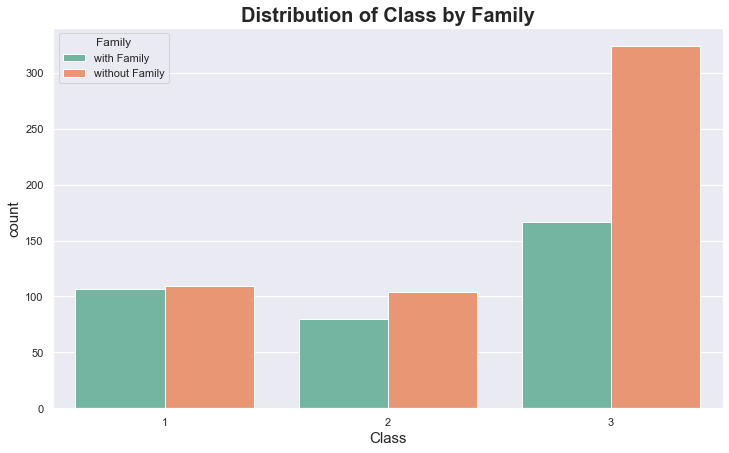

In [253]:
sns.countplot(x=CLASS, hue=FAMILY, data=df_cleaned).set(title="Distribution of Class by Family");
pvt = df_cleaned.pivot_table(values=PASSENGER_ID, index=FAMILY, columns=CLASS, aggfunc="count")
pvt

We can see that (in relative and absolute terms) there are more non-family passengers in third class. Is this why passengers with no family on board died more often?

In [254]:
pvt = df_cleaned.pivot_table(values=PASSENGER_ID, index=[SURVIVED_CAT, CLASS], columns=FAMILY, aggfunc="count").sort_index(ascending=(False, True))
pvt

Family              with Family  without Family
Survived_Cat Class                             
survived     1               78              58
             2               51              36
             3               50              69
died         1               29              51
             2               29              68
             3              117             255

Family,with Family,without Family
Class,,
1,0.728972,0.532110
2,0.637500,0.346154
3,0.299401,0.212963


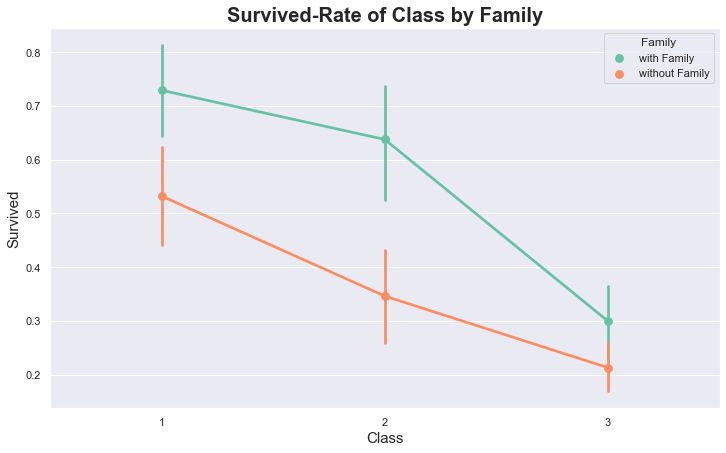

In [256]:
sns.pointplot(x=CLASS, y=SURVIVED, hue=FAMILY, data=df_cleaned).set(title="Survived-Rate of Class by Family");
pvt.loc["survived"] / (pvt.loc["died"] + pvt.loc["survived"])

So it does not seem to be due to the fact that the passengers without families on board were more often in 3rd class. Because if you calculate the survival rate of the two traits for each class, you see the same trend within each class.

Person,child,female,male
Family,,,
with Family,77,150,127
without Family,6,121,410


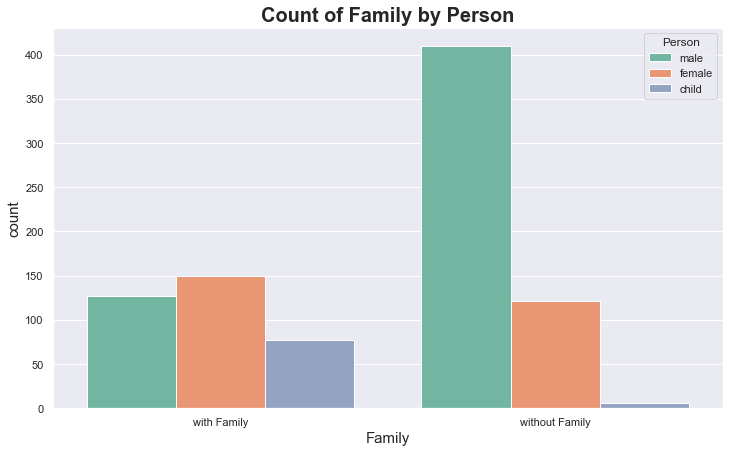

In [257]:
sns.countplot(x=FAMILY, hue=PERSON, data=df_cleaned).set(title="Count of Family by Person");
df_cleaned.pivot_table(values=SURVIVED, index=FAMILY, columns=PERSON, aggfunc="count")

Here we can see that mainly men fall under the category "without family". <br>
We have already found that gender has a significant impact on survival. And men died significantly more often than women or children <br>
So let's look again at the data (relating to 'Family') without the men

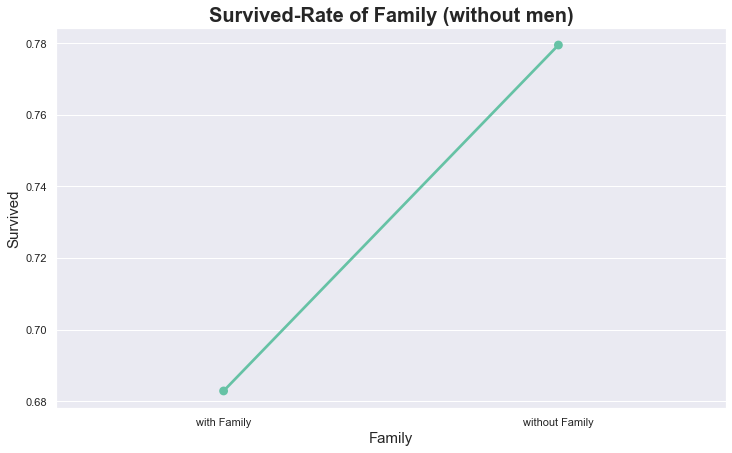

In [258]:
male_removed = df_cleaned[df_cleaned[PERSON] != "male"]
sns.pointplot(x=FAMILY, y=SURVIVED, data=male_removed, ci=False, ylim=(0.4, 1)).set(title="Survived-Rate of Family (without men)");

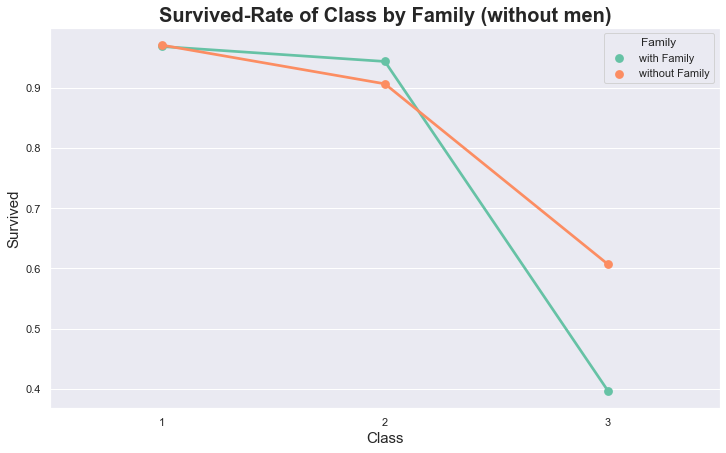

In [259]:
sns.pointplot(x=CLASS, y=SURVIVED, hue=FAMILY, data=male_removed, ci=False).set(title="Survived-Rate of Class by Family (without men)");

As we finally see, the picture has been reversed. It is now the case that passengers without families on board have a higher chance of survival. <br>
From this we conclude:

- The feature `Person` has too much impact on this feature
- Because of this, we cannot say with certainty if this feature had any impact on survival on the Titanic

## Does the `Age` has any affect on the survival?

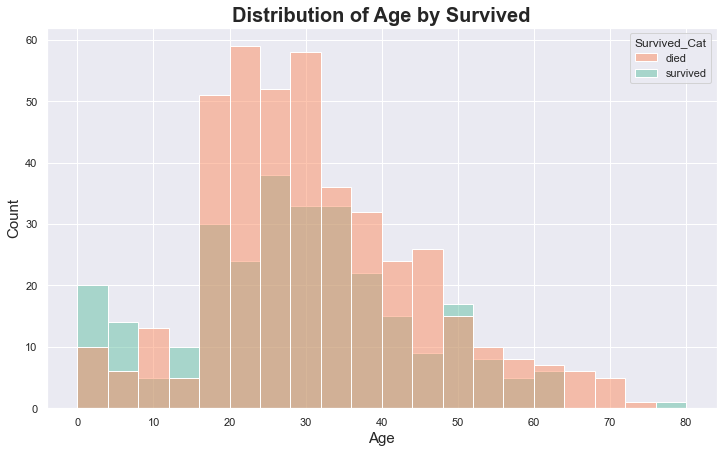

In [261]:
sns.histplot(x=AGE, hue=SURVIVED_CAT, data=df_cleaned, palette=cmap_survived_died).set(title="Distribution of Age by Survived");

In [126]:
# DEVTED (better name!)
# BUT -> return a df with Age_Group_Num & Age_Group_Range -> only one function, with the possibility to concat the groups to an existing df, by passing "inplace" to this!
def gen_dict_of_age_groupes(max_age, group_range):
    return {(0 if i == 0 else int(i / (group_range))): (f"[{0}, {group_range}]" if i == 0 else f"({i}, {i + group_range}]") for i in range(0, max_age, group_range)}

def get_age_group_number(age, group_range):
    return int((age - 1) / group_range)

def get_age_group_string(age, group_range, age_group_dict):
    group_num = get_age_group_number(age, group_range)
    return age_group_dict[group_num]

In [127]:
df_age_cleaned = df_cleaned.copy()
df_age_cleaned = df_age_cleaned[(df_age_cleaned[AGE].notna()) & (~df_age_cleaned[PASSENGER_ID].isin([571, 631]))] # removes also a outlier!
df_age_cleaned[AGE] = df_age_cleaned[AGE].astype("int")


# HERE SLIDER FOR SHINY APP
AGE_GROUP_RANGE_NUM = 5
AGE_GROUP_RANGE = "Age_Group_Range"
AGE_GROUP = "Age_Group"

AGE_GROUPES = gen_dict_of_age_groupes(df_age_cleaned[AGE].max(), AGE_GROUP_RANGE_NUM)

df_age_cleaned[AGE_GROUP] = df_age_cleaned[AGE].apply(lambda age: get_age_group_number(age, AGE_GROUP_RANGE_NUM))
df_age_cleaned[AGE_GROUP_RANGE] = df_age_cleaned[AGE_GROUP].map(AGE_GROUPES)
df_age_cleaned.sort_values(by=AGE_GROUP, inplace=True)
df_age_cleaned

,PassengerId,Survived,Class,Sex,Age,Ticket_Price,Cabin,Embarked,Survived_Cat,Family,Person,Age_Group,Age_Group_Range
644,645,1,3,female,0,19.2583,NaN,Cherbourg,survived,with Family,child,0,"[0, 5]"
448,449,1,3,female,5,19.2583,NaN,Cherbourg,survived,with Family,child,0,"[0, 5]"
119,120,0,3,female,2,31.2750,NaN,Southampton,died,with Family,child,0,"[0, 5]"
374,375,0,3,female,3,21.0750,NaN,Southampton,died,with Family,child,0,"[0, 5]"
297,298,0,1,female,2,151.5500,C,Southampton,died,with Family,child,0,"[0, 5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,0,1,male,70,71.0000,B,Southampton,died,with Family,male,13,"(65, 70]"
33,34,0,2,male,66,10.5000,NaN,Southampton,died,without Family,male,13,"(65, 70]"
493,494,0,1,male,71,49.5042,NaN,Cherbourg,died,without Family,male,14,"(70, 75]"
851,852,0,3,male,74,7.7750,NaN,Southampton,died,without Family,male,14,"(70, 75]"


In [128]:
df_age_cleaned.shape

(712, 13)

In [129]:
df_age_cleaned[AGE_GROUP_RANGE].value_counts(sort=False)

[0, 5]       44
(5, 10]      20
(10, 15]     19
(15, 20]     97
(20, 25]    121
(25, 30]    110
(30, 35]     86
(35, 40]     69
(40, 45]     47
(45, 50]     37
(50, 55]     25
(55, 60]     17
(60, 65]     13
(65, 70]      4
(70, 75]      3
Name: Age_Group_Range, dtype: int64

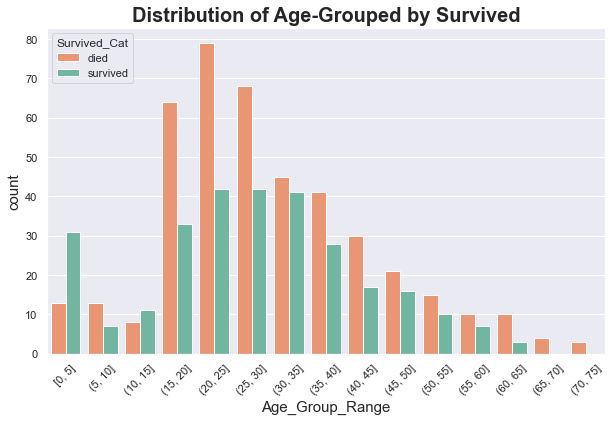

In [262]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
sns.countplot(x=AGE_GROUP_RANGE, hue=SURVIVED_CAT, data=df_age_cleaned, palette=cmap_survived_died).set(title="Distribution of AgeGroup by Survived");

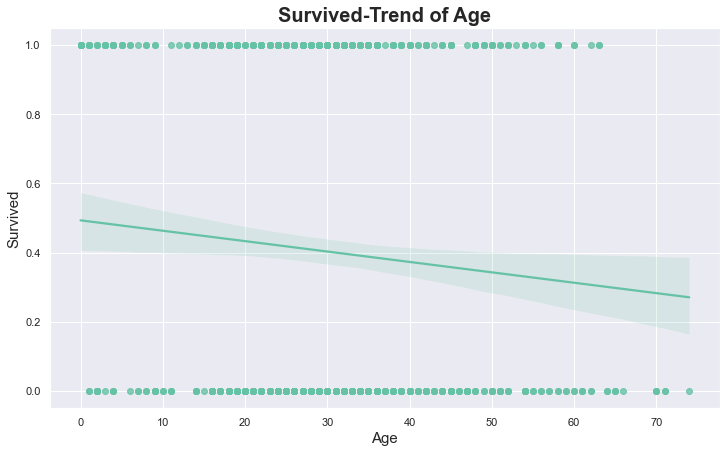

In [266]:
sns.regplot(x=AGE, y=SURVIVED, data=df_age_cleaned).set(title="Survived-Trend of Age");

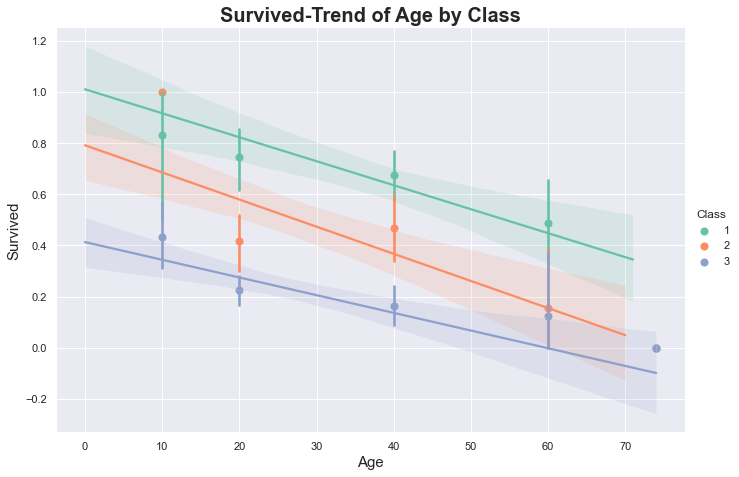

In [272]:
generations = [10, 20, 40, 60, df_age_cleaned[AGE].max()]
sns.lmplot(x=AGE, y=SURVIVED, data=df_age_cleaned, hue=CLASS, x_bins=generations, aspect=1.5, height=6.5).set(title="Survived-Trend of Age by Class");

In [133]:
df_age_cleaned[(df_age_cleaned["Age_Group"] == 12) & (df_age_cleaned[CLASS] == 2)]

,PassengerId,Survived,Class,Sex,Age,Ticket_Price,Cabin,Embarked,Survived_Cat,Family,Person,Age_Group,Age_Group_Range


Age_Group  Age_Group_Range
0          (10, 15]           NaN
           (15, 20]           NaN
           (20, 25]           NaN
           (25, 30]           NaN
           (30, 35]           NaN
                             ... 
14         (55, 60]           NaN
           (60, 65]           NaN
           (65, 70]           NaN
           (70, 75]           0.0
           [0, 5]             NaN
Length: 225, dtype: float64

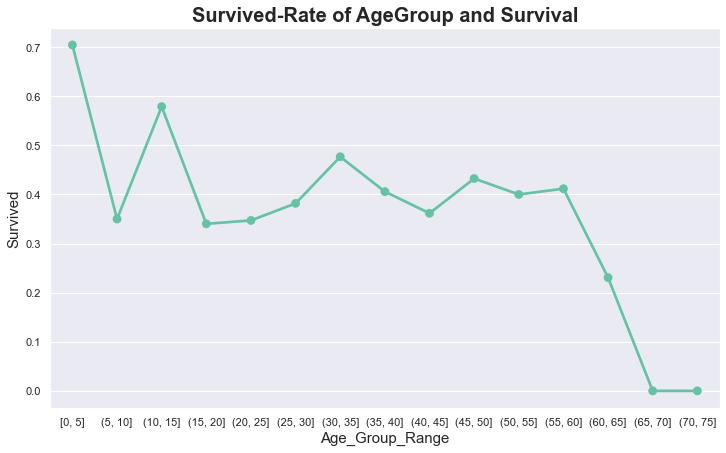

In [273]:
sns.pointplot(x=AGE_GROUP_RANGE, y=SURVIVED, data=df_age_cleaned, ci=False, aspect=2).set(title="Survived-Rate of AgeGroup and Survival")

pvt = df_age_cleaned.pivot_table(values=PASSENGER_ID, index=[AGE_GROUP, AGE_GROUP_RANGE], columns=SURVIVED_CAT, aggfunc="count").fillna(0)
pvt["survived"] / (pvt["survived"] + pvt["died"])

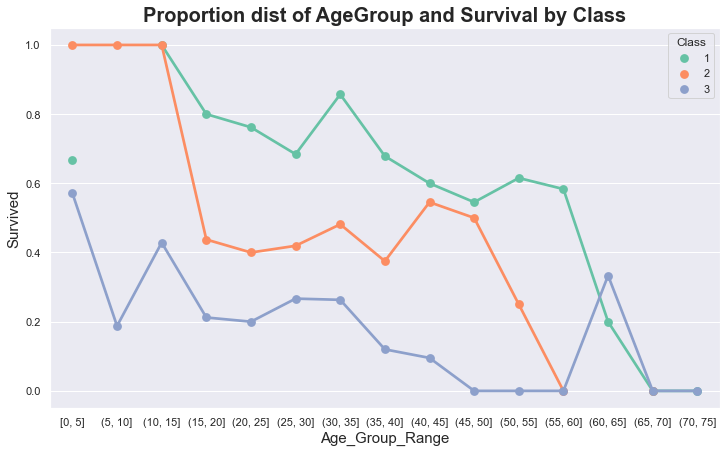

In [135]:
sns.pointplot(x=AGE_GROUP_RANGE, y=SURVIVED, data=df_age_cleaned, hue=CLASS, ci=False, aspect=2,  height=6).set(title="Survived-Rate of AgeGroup and Survival by Class");

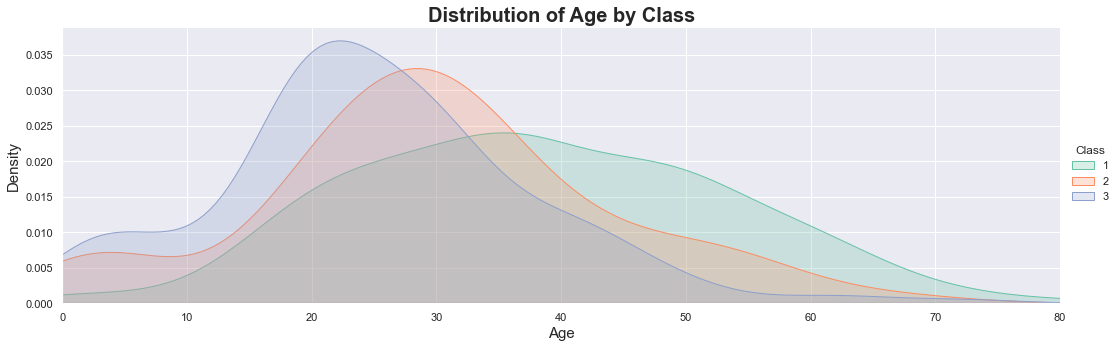

In [274]:
fig = sns.FacetGrid(df_cleaned, hue=CLASS, aspect=3, height=5).set(title="Distribution of Age by Class")
fig.map(sns.kdeplot, AGE, shade=True)
fig.set(xlim=(0, df_cleaned[AGE].max()))
fig.add_legend();

Okay. In the chart `Proportion dist of AgeGroup and Survival` we can see, that younger passengers between 0 and 15 got an much higher and passengers between 25 and 40 got an higher chance to survive then the other groups. <br>
We can also see that older people, after there 60s got a significant lower chance to survive. <br>
<br>
**Why younger passengers:** <br>
In my opinion this comes from the legendary sentence: *women and children first*. Children have a special protection status in our society. So people take more considerations of them. <br>
<br>
**Why passengers between 25 and 40:** <br>
In the chart `Proportion normalize dist of AgeGroup and Survival by Class` you can see, that the concentration of first-class passengers is at the highest in this range. And the fact that a first-class passenger has a much higher chance to survive then e.g. a third-class passenger, this could be the reason, why passengers between 25 and 40 more survived. <br>
Also, they are physically fit and assertive. More fit then passengers over 40 and more assertive then younger passengers. <br>
<br>
**Why older passengers got this worse chance to survive** <br>
Oh well this could be, because older passengers are not as physically resilient as younger ones.

## Does the `Person` has any affect on the survival?

Person,child,female,male
Survived_Cat,,,
survived,49,205,88
died,34,66,449


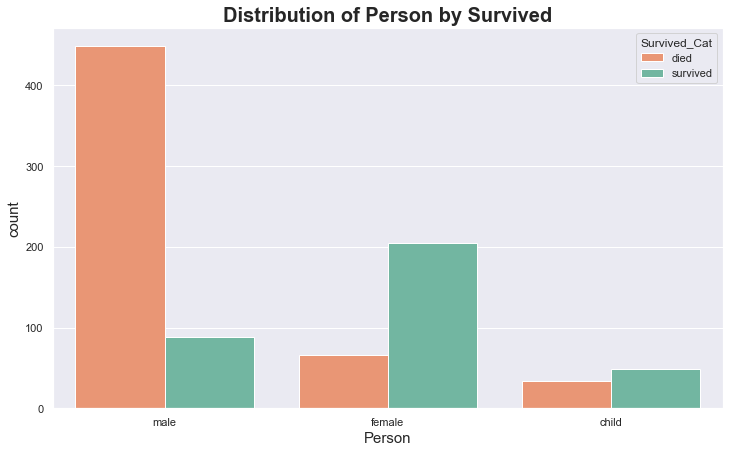

In [276]:
sns.countplot(x=PERSON, hue=SURVIVED_CAT, data=df_cleaned, palette=cmap_survived_died).set(title="Distribution of Person by Survived");
pvt = df_cleaned.pivot_table(values=PASSENGER_ID, index=SURVIVED_CAT, columns=PERSON, aggfunc="count").sort_index(ascending=False)
pvt

Person,child,female,male
Survived_Cat,,,
survived,0.590361,0.756458,0.163873
died,0.409639,0.243542,0.836127


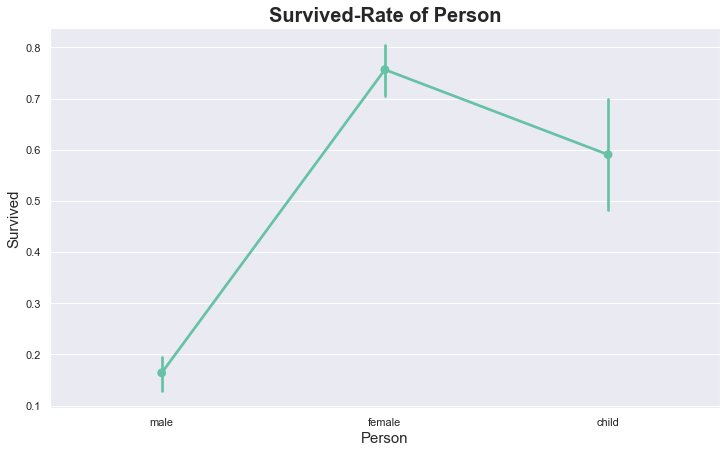

In [277]:
sns.pointplot(x=PERSON, y=SURVIVED, data=df_cleaned).set(title="Survived-Rate of Person");
pvt / pvt.sum()

Oh. That looks terable for the survival rate of male passengers. <br>
Take a more differentiated look at this data by combining this with the `Class`.

Person,child,female,male
Class,,,
1,0.833333,0.978022,0.352941
2,1.000000,0.909091,0.080808
3,0.431034,0.491228,0.119122


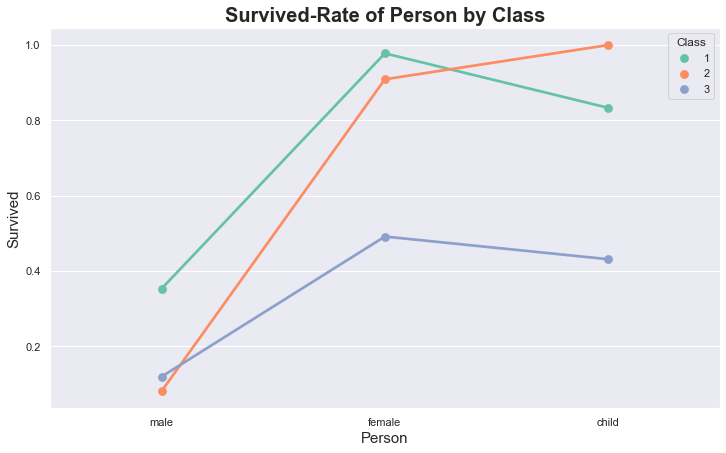

In [278]:
sns.pointplot(x=PERSON, y=SURVIVED, data=df_cleaned, hue=CLASS, ci=False).set(title="Survived-Rate of Person by Class");
pvt = df_cleaned.pivot_table(values=PASSENGER_ID, index=(SURVIVED_CAT, CLASS), columns=PERSON, aggfunc="count").fillna(0).sort_index(ascending=(False, True))
pvt.loc["survived"] / (pvt.loc["survived"] + pvt.loc["died"])

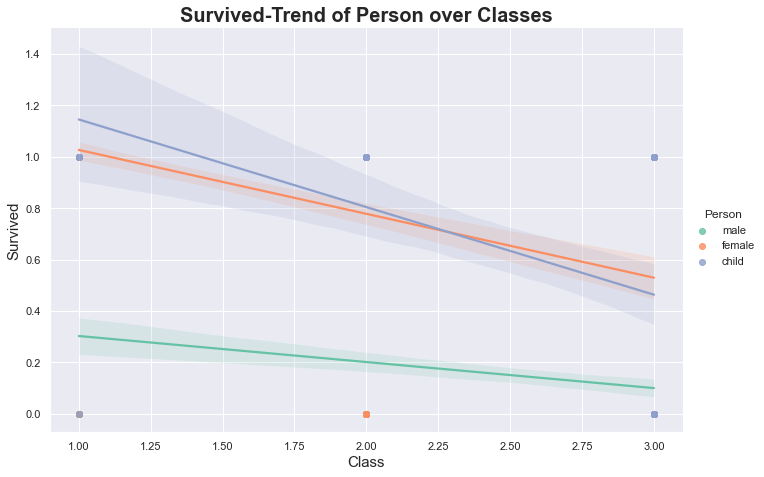

In [282]:
sns.lmplot(x=CLASS, y=SURVIVED, hue=PERSON, data=df_cleaned, aspect=1.5, height=6.5).set(title="Survived-Trend of Person over Classes");

Well. As expected, first-class passengers got the best chance to survive, no matter of the `Person`. <br>
And we validate our previous result, that male passengers has the lowest chance to survive, no matter of the `Class`. <br>
Female passengers in first- and second-class got the highest chance to survive and in third-class the children.

Person
female    0.756458
child     0.590361
male      0.163873
Name: 1, dtype: float64

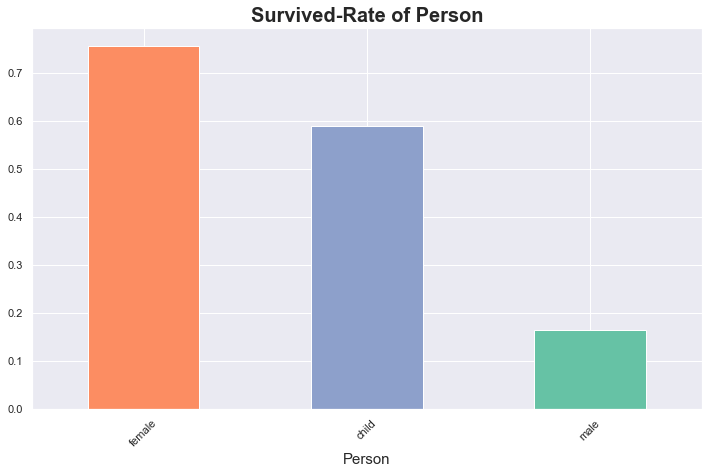

In [285]:
pvt = df_cleaned.pivot_table(values=PASSENGER_ID, index=SURVIVED, columns=PERSON, aggfunc="count").sort_index(ascending=False)
unpvt = pvt / pvt.sum()
prob_survival_person = unpvt.loc[1].sort_values(ascending=False)
prob_survival_person.plot.bar(color=["C1", "C2", "C0"], rot=45, title="Survived-Rate of Person")
prob_survival_person

In [142]:
female_vs_male = np.round((prob_survival_person.loc["female"] / prob_survival_person.loc["male"] - 1) * 100, 2)
female_vs_child = np.round((prob_survival_person.loc["female"] / prob_survival_person.loc["child"] - 1) * 100, 2)

f"{female_vs_male}%", f"{female_vs_child}%"

('361.61%', '28.13%')

In the end, proportional got female passengers a 361.61% better chance to survive than male passengers and 28.13% better chance to survive then children.

## Does the `Cabin` has any affect on the survival?

Survived_Cat,died,survived
Cabin,,
A,8,7
B,12,35
C,24,35
D,8,25
E,8,24
F,5,8
G,2,2


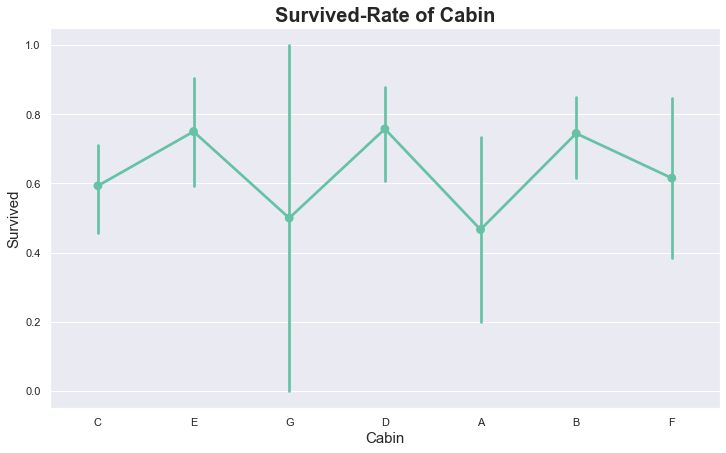

In [286]:
df_cabin_cleaned = df_cleaned[(df_cleaned[CABIN].notna()) & (~df_cleaned[CABIN].isin(["T"]))]

sns.pointplot(x=CABIN, y=SURVIVED, data=df_cabin_cleaned).set(title="Survived-Rate of Cabin");
df_cabin_cleaned.pivot_table(values=PASSENGER_ID, index=CABIN, columns=SURVIVED_CAT, aggfunc="count")

In [144]:
df_cabin_cleaned.pivot_table(values=SURVIVED_CAT, index=(CABIN, CLASS), aggfunc="count").rename(columns={SURVIVED_CAT: "count"})

count
Cabin Class       
A     1         15
B     1         47
C     1         59
D     1         29
      2          4
E     1         25
      2          4
      3          3
F     2          8
      3          5
G     3          4

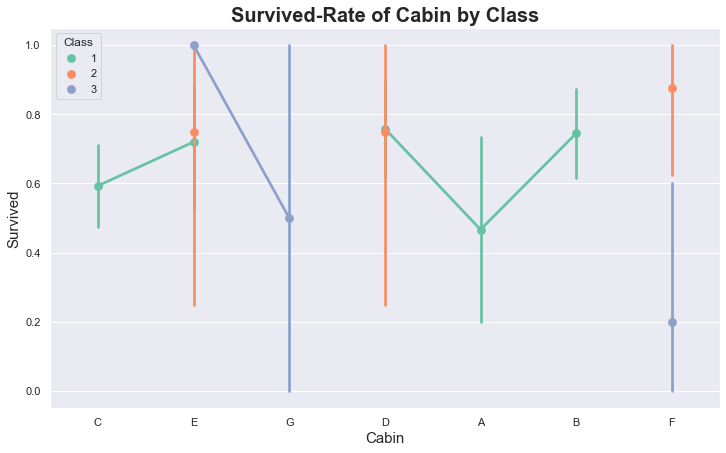

In [287]:
sns.pointplot(x=CABIN, y=SURVIVED, hue=CLASS, data=df_cabin_cleaned).set(title="Survived-Rate of Cabin by Class");

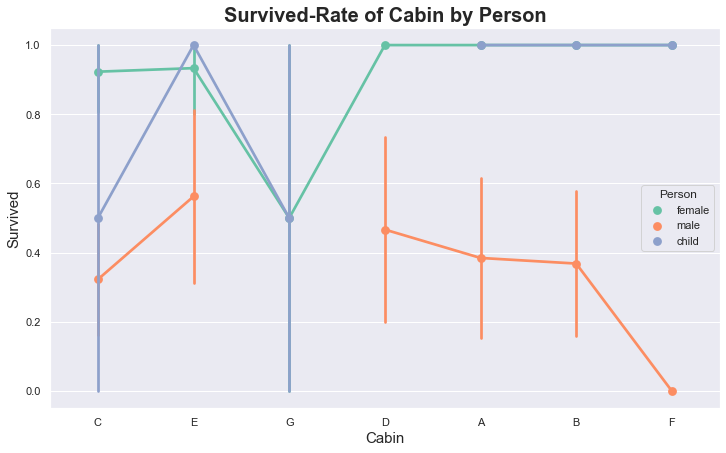

In [288]:
sns.pointplot(x=CABIN, y=SURVIVED, hue=PERSON, data=df_cabin_cleaned).set(title="Survived-Rate of Cabin by Person");

In [147]:
df_cabin_cleaned.shape[0], df_cleaned.shape[0]

(203, 891)

There are not enough data to say, that a specific cabin has an strong affect on the chance to survive!

# CONCLUSION 
## Which groups and combinations got the best chance to survive?


### Best chances to survive
**Women and children** <br>
Women and children has got a much higher chance to survive, then men. <br>
The reason for this could be the legendary sentence 'Women and children first.' <br>
<br>
**First-class passengers** <br>
First-class passengers also has got a much higher chance to survive, then second- and third-class passengers. <br>
After a small recherche, the reason for this was the number of lifeboats and the strict class division between poor and rich people. First-class passengers slept upstairs and got a much better and faster chance to get one of the few lifeboats. <br>
<br>
**Passengers without family** <br>
Passengers without family had also a significant higher chance to survive, then passengers with family. <br>
In my estimation, the reason for this result could be, that people with family on board, wont leave the ship before they found there family members. <br>

**Overview** <br>
- be a woman
- be a child
- be in the first class
- no family on board
- be younger then 60
<br>

### Worst chances to survive

**Overview** <br>
- be a man
- be in the third class
- with family on board
- be older then 60